# 전국 의료기관 및 의료인력 분포 현황 분석
- 2020-2분기 기준
- 자료 출처 : [보건의료빅데이터개방시스템](https://opendata.hira.or.kr/home.do)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from pywaffle import Waffle
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

## 데이터셋 불러오기

In [2]:
df_org = pd.read_excel("Data/지역별_종별_요양기관수_현황.xls")
df_org.head(10)

,1.지역별 종별 요양기관수 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,지역별 종별 요양기관수 현황 (단위 : 개소),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,police_div ('police_main')\nSHEET_NAME ('지역별...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,시도,시군구,계,상급종합병원,종합병원,병원,요양병원,의원,치과병원,치과의원,조산원,보건소,보건지소,보건진료소,보건의료원,약국,한방병원,한의원
6,서울,계,"23,025",13,44,230,126,"8,775",64,"4,858",3,25,8,0,0,"5,200",56,"3,623"
7,서울,종로구,674,2,2,3,-,196,1,162,-,1,-,-,-,177,-,130
8,서울,중구,744,-,2,4,-,250,6,212,-,1,-,-,-,170,1,98
9,서울,용산구,432,-,1,2,-,135,-,104,1,1,-,-,-,126,-,62


In [3]:
df_doctor = pd.read_excel("Data/지역별_종별_의료인력현황(의사).xls")
df_doctor.head(10)

,1.지역별 종별 의료인력현황1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,지역별 종별 의료인력 현황(단위: 명),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,police_div ('police_main')\nSHEET_NAME ('지역별...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,인력코드상위,의사,의사,의사,의사,의사,치과의사,치과의사,치과의사,...,한의사,한의사,한의사,한의사,한의사,조산사,약사계,물리치료사,작업치료사,사회복지사
6,시도,요양기관종별,의사계,일반의,인턴,레지던트,전문의,치과의사계,치과일반의,치과인턴,...,한의사계,한의사일반의,한의사일반수련의,한의사전문수련의,한의사전문의,조산사,약사계,물리치료사,작업치료사,사회복지사
7,서울,소계,"31,197","1,236","1,303","4,398","24,260","7,384","5,147",147,...,"5,069","4,044",87,149,789,17,"9,536","8,710","1,340",546
8,서울,상급종합병원,"10,212",91,931,"3,092","6,098",230,8,23,...,-,-,-,-,-,-,"1,002",255,96,97
9,서울,종합병원,"5,317",42,372,"1,255","3,648",177,31,15,...,8,1,-,2,5,-,536,437,103,108


In [4]:
df_nurse = pd.read_excel("Data/지역별_종별_의료인력현황(간호사).xls")
df_nurse.head(10)

,1. 지역별 종별 의료인력현황2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,지역별 종별 의료인력 현황(단위: 명),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,police_div ('police_main')\nSHEET_NAME ('지역별...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,인력코드상위,간호사,간호사,간호사,간호사,간호사,간호사,간호조무사,임상병리사,...,보건의료정보관리사,동위원소취급자(일반),동위원소취급자(특수),방사선취급감독자,영양사,조리사,조혈모세포이식담당자,안경사,기타종사자,정신건강전문요원계
6,시도,요양기관종별,간호사계,간호사,가정전문간호사,보건전문간호사,마취전문간호사,정신전문간호사,간호조무사,임상병리사,...,보건의료정보관리사,동위원소취급자(일반),동위원소취급자(특수),방사선취급감독자,영양사,조리사,조혈모세포이식담당자,안경사,기타종사자,정신건강전문요원계
7,서울,계,"54,186","53,864",175,13,50,84,"38,079","6,473",...,"1,107",249,69,58,"1,051","1,088",44,659,"26,103",294
8,서울,상급종합병원,"23,440","23,314",102,1,0,23,822,"2,382",...,347,143,27,17,225,47,41,36,"9,279",118
9,서울,종합병원,"14,711","14,658",40,1,3,9,"1,878","1,468",...,304,51,28,10,165,102,3,24,"5,788",47


## 데이터 전처리

In [5]:
df_org = df_org.drop([0, 1, 2, 3, 4]).reset_index(drop=True)
df_org = df_org.rename(columns=df_org.iloc[0]).drop(df_org.index[0]).reset_index(drop=True)
df_org.head()

,시도,시군구,계,상급종합병원,종합병원,병원,요양병원,의원,치과병원,치과의원,조산원,보건소,보건지소,보건진료소,보건의료원,약국,한방병원,한의원
0,서울,계,"23,025",13,44,230,126,"8,775",64,"4,858",3,25,8,0,0,"5,200",56,"3,623"
1,서울,종로구,674,2,2,3,-,196,1,162,-,1,-,-,-,177,-,130
2,서울,중구,744,-,2,4,-,250,6,212,-,1,-,-,-,170,1,98
3,서울,용산구,432,-,1,2,-,135,-,104,1,1,-,-,-,126,-,62
4,서울,성동구,601,1,-,6,3,217,1,129,-,1,-,-,-,148,-,95


In [6]:
df_doctor = df_doctor.drop([0, 1, 2, 3, 4, 5]).reset_index(drop=True)
df_doctor = df_doctor.rename(columns=df_doctor.iloc[0]).drop(df_doctor.index[0]).reset_index(drop=True)
df_doctor.head()

,시도,요양기관종별,의사계,일반의,인턴,레지던트,전문의,치과의사계,치과일반의,치과인턴,...,한의사계,한의사일반의,한의사일반수련의,한의사전문수련의,한의사전문의,조산사,약사계,물리치료사,작업치료사,사회복지사
0,서울,소계,"31,197","1,236","1,303","4,398","24,260","7,384","5,147",147,...,"5,069","4,044",87,149,789,17,"9,536","8,710","1,340",546
1,서울,상급종합병원,"10,212",91,931,"3,092","6,098",230,8,23,...,-,-,-,-,-,-,"1,002",255,96,97
2,서울,종합병원,"5,317",42,372,"1,255","3,648",177,31,15,...,8,1,-,2,5,-,536,437,103,108
3,서울,병원,"2,108",33,-,51,"2,024",34,21,-,...,17,9,-,-,8,4,259,"1,711",449,96
4,서울,요양병원,543,53,-,-,490,3,3,-,...,118,97,-,-,21,-,136,"1,110",586,175


In [7]:
df_nurse = df_nurse.drop([0, 1, 2, 3, 4, 5]).reset_index(drop=True)
df_nurse = df_nurse.rename(columns=df_nurse.iloc[0]).drop(df_nurse.index[0]).reset_index(drop=True)
df_nurse.head()

,시도,요양기관종별,간호사계,간호사,가정전문간호사,보건전문간호사,마취전문간호사,정신전문간호사,간호조무사,임상병리사,...,보건의료정보관리사,동위원소취급자(일반),동위원소취급자(특수),방사선취급감독자,영양사,조리사,조혈모세포이식담당자,안경사,기타종사자,정신건강전문요원계
0,서울,계,"54,186","53,864",175,13,50,84,"38,079","6,473",...,"1,107",249,69,58,"1,051","1,088",44,659,"26,103",294
1,서울,상급종합병원,"23,440","23,314",102,1,0,23,822,"2,382",...,347,143,27,17,225,47,41,36,"9,279",118
2,서울,종합병원,"14,711","14,658",40,1,3,9,"1,878","1,468",...,304,51,28,10,165,102,3,24,"5,788",47
3,서울,병원,"6,061","5,975",2,1,44,39,"3,202",569,...,158,23,2,10,278,388,0,65,"2,771",72
4,서울,요양병원,"3,120","3,118",2,0,0,0,"1,652",31,...,150,0,0,4,248,297,0,0,695,4


In [8]:
cols=[i for i in df_org.columns if i not in ['시도', '시군구']]
for col in cols:
    df_org[col] = df_org[col].apply(lambda x : x.replace(',', ''))
    df_org[col] = df_org[col].apply(lambda x : x.replace('-', '0'))
    df_org[col] = pd.to_numeric(df_org[col], downcast='integer')
df_org.dtypes

시도        object
시군구       object
계          int16
상급종합병원      int8
종합병원        int8
병원         int16
요양병원       int16
의원         int16
치과병원        int8
치과의원       int16
조산원         int8
보건소         int8
보건지소       int16
보건진료소      int16
보건의료원       int8
약국         int16
한방병원        int8
한의원        int16
dtype: object

In [9]:
cols=[i for i in df_doctor.columns if i not in ['시도', '요양기관종별']]
for col in cols:
    df_doctor[col] = df_doctor[col].apply(lambda x : x.replace(',', ''))
    df_doctor[col] = df_doctor[col].apply(lambda x : x.replace('-', '0'))
    df_doctor[col] = pd.to_numeric(df_doctor[col], downcast='integer')
df_doctor.dtypes

시도          object
요양기관종별      object
의사계          int16
일반의          int16
인턴           int16
레지던트         int16
전문의          int16
치과의사계        int16
치과일반의        int16
치과인턴         int16
치과레지턴트       int16
치과전문의        int16
한의사계         int16
한의사일반의       int16
한의사일반수련의      int8
한의사전문수련의     int16
한의사전문의       int16
조산사           int8
약사계          int16
물리치료사        int16
작업치료사        int16
사회복지사        int16
dtype: object

In [10]:
cols=[i for i in df_nurse.columns if i not in ['시도', '요양기관종별']]
for col in cols:
    df_nurse[col] = df_nurse[col].apply(lambda x : x.replace(',', ''))
    df_nurse[col] = df_nurse[col].apply(lambda x : x.replace('-', '0'))
    df_nurse[col] = pd.to_numeric(df_nurse[col], downcast='integer')
df_nurse.dtypes

시도             object
요양기관종별         object
간호사계            int32
간호사             int32
가정전문간호사         int16
보건전문간호사          int8
마취전문간호사          int8
정신전문간호사          int8
간호조무사           int32
임상병리사           int16
방사선사            int16
치과기공사           int16
치과위생사           int16
보건의료정보관리사       int16
동위원소취급자(일반)     int16
동위원소취급자(특수)      int8
방사선취급감독자         int8
영양사             int16
조리사             int16
조혈모세포이식담당자       int8
안경사             int16
기타종사자           int16
정신건강전문요원계       int16
dtype: object

## folium으로 시각화

In [11]:
indexs = df_org[df_org['시군구'] != '계'].index
df_org_sido = df_org.drop(indexs)
df_org_sido.head()

,시도,시군구,계,상급종합병원,종합병원,병원,요양병원,의원,치과병원,치과의원,조산원,보건소,보건지소,보건진료소,보건의료원,약국,한방병원,한의원
0,서울,계,23025,13,44,230,126,8775,64,4858,3,25,8,0,0,5200,56,3623
26,부산,계,6827,4,25,144,187,2407,24,1284,2,16,11,5,0,1560,12,1146
43,인천,계,4536,3,16,65,70,1580,9,924,1,10,27,26,0,1117,32,656
54,대구,계,5128,5,12,109,72,1821,16,886,0,8,9,8,0,1303,3,876
63,광주,계,2883,2,22,82,65,960,14,631,0,5,1,10,0,687,84,320


In [12]:
indexs = df_doctor[df_doctor['요양기관종별'] != '소계'].index
df_doctor_sido = df_doctor.drop(indexs)
df_doctor_sido.head()

,시도,요양기관종별,의사계,일반의,인턴,레지던트,전문의,치과의사계,치과일반의,치과인턴,...,한의사계,한의사일반의,한의사일반수련의,한의사전문수련의,한의사전문의,조산사,약사계,물리치료사,작업치료사,사회복지사
0,서울,소계,31197,1236,1303,4398,24260,7384,5147,147,...,5069,4044,87,149,789,17,9536,8710,1340,546
14,부산,소계,8169,380,214,704,6871,1782,1480,3,...,1731,1489,14,37,191,4,2844,3416,661,392
28,인천,소계,5162,252,136,406,4368,1327,1029,5,...,1006,872,7,5,122,8,1957,2510,526,244
42,대구,소계,5981,166,211,683,4921,1320,1021,0,...,1158,1025,11,16,106,0,2111,2337,628,221
55,광주,소계,3694,157,99,334,3104,1030,689,36,...,721,534,35,16,136,0,1305,1775,316,176


In [13]:
indexs = df_nurse[df_nurse['요양기관종별'] != '계'].index
df_nurse_sido = df_nurse.drop(indexs)
df_nurse_sido.head()

,시도,요양기관종별,간호사계,간호사,가정전문간호사,보건전문간호사,마취전문간호사,정신전문간호사,간호조무사,임상병리사,...,보건의료정보관리사,동위원소취급자(일반),동위원소취급자(특수),방사선취급감독자,영양사,조리사,조혈모세포이식담당자,안경사,기타종사자,정신건강전문요원계
0,서울,계,54186,53864,175,13,50,84,38079,6473,...,1107,249,69,58,1051,1088,44,659,26103,294
14,부산,계,18643,18543,16,12,39,33,18238,1945,...,526,92,25,17,707,980,7,203,7516,155
27,인천,계,12062,11968,70,0,21,3,11707,1282,...,273,22,10,6,351,508,2,161,4974,99
40,대구,계,12684,12648,19,1,1,15,10077,1525,...,256,77,17,11,381,620,26,48,6090,127
54,광주,계,9091,9046,10,1,1,33,7872,951,...,171,11,6,14,454,639,6,65,3899,85


In [14]:
center = [36.541, 127.986]
geo_data = 'Data/TL_SCCO_CTPRVN_edit.json'

In [15]:
m_org = folium.Map(location=center, zoom_start=6)

folium.Choropleth(
    geo_data=geo_data,
    data=df_org_sido,
    columns=('시도', '계'),
    key_on='feature.properties.CTP_KOR_NM',
    fill_color='PuRd',
    legend_name='계',
).add_to(m_org)

m_org

In [16]:
m_doctor = folium.Map(location=center, zoom_start=6)

folium.Choropleth(
    geo_data=geo_data,
    data=df_doctor_sido,
    columns=('시도', '의사계'),
    key_on='feature.properties.CTP_KOR_NM',
    fill_color='PuRd',
    legend_name='의사계',
).add_to(m_doctor)

m_doctor

In [17]:
m_nurse = folium.Map(location=center, zoom_start=6)

folium.Choropleth(
    geo_data=geo_data,
    data=df_nurse_sido,
    columns=('시도', '간호사계'),
    key_on='feature.properties.CTP_KOR_NM',
    fill_color='PuRd',
    legend_name='간호사계',
).add_to(m_nurse)

m_nurse

## waffle chart로 시각화 하기

In [18]:
org = df_org_sido.set_index('시도')
org.head()

,시군구,계,상급종합병원,종합병원,병원,요양병원,의원,치과병원,치과의원,조산원,보건소,보건지소,보건진료소,보건의료원,약국,한방병원,한의원
시도,,,,,,,,,,,,,,,,,
서울,계,23025,13,44,230,126,8775,64,4858,3,25,8,0,0,5200,56,3623
부산,계,6827,4,25,144,187,2407,24,1284,2,16,11,5,0,1560,12,1146
인천,계,4536,3,16,65,70,1580,9,924,1,10,27,26,0,1117,32,656
대구,계,5128,5,12,109,72,1821,16,886,0,8,9,8,0,1303,3,876
광주,계,2883,2,22,82,65,960,14,631,0,5,1,10,0,687,84,320


In [19]:
doc = df_doctor_sido.set_index('시도')
doc.head()

,요양기관종별,의사계,일반의,인턴,레지던트,전문의,치과의사계,치과일반의,치과인턴,치과레지턴트,...,한의사계,한의사일반의,한의사일반수련의,한의사전문수련의,한의사전문의,조산사,약사계,물리치료사,작업치료사,사회복지사
시도,,,,,,,,,,,,,,,,,,,,,
서울,소계,31197,1236,1303,4398,24260,7384,5147,147,433,...,5069,4044,87,149,789,17,9536,8710,1340,546
부산,소계,8169,380,214,704,6871,1782,1480,3,5,...,1731,1489,14,37,191,4,2844,3416,661,392
인천,소계,5162,252,136,406,4368,1327,1029,5,6,...,1006,872,7,5,122,8,1957,2510,526,244
대구,소계,5981,166,211,683,4921,1320,1021,0,59,...,1158,1025,11,16,106,0,2111,2337,628,221
광주,소계,3694,157,99,334,3104,1030,689,36,88,...,721,534,35,16,136,0,1305,1775,316,176


In [20]:
nurse = df_nurse_sido.set_index('시도')
nurse.head()

,요양기관종별,간호사계,간호사,가정전문간호사,보건전문간호사,마취전문간호사,정신전문간호사,간호조무사,임상병리사,방사선사,...,보건의료정보관리사,동위원소취급자(일반),동위원소취급자(특수),방사선취급감독자,영양사,조리사,조혈모세포이식담당자,안경사,기타종사자,정신건강전문요원계
시도,,,,,,,,,,,,,,,,,,,,,
서울,계,54186,53864,175,13,50,84,38079,6473,7033,...,1107,249,69,58,1051,1088,44,659,26103,294
부산,계,18643,18543,16,12,39,33,18238,1945,2119,...,526,92,25,17,707,980,7,203,7516,155
인천,계,12062,11968,70,0,21,3,11707,1282,1429,...,273,22,10,6,351,508,2,161,4974,99
대구,계,12684,12648,19,1,1,15,10077,1525,1619,...,256,77,17,11,381,620,26,48,6090,127
광주,계,9091,9046,10,1,1,33,7872,951,1026,...,171,11,6,14,454,639,6,65,3899,85


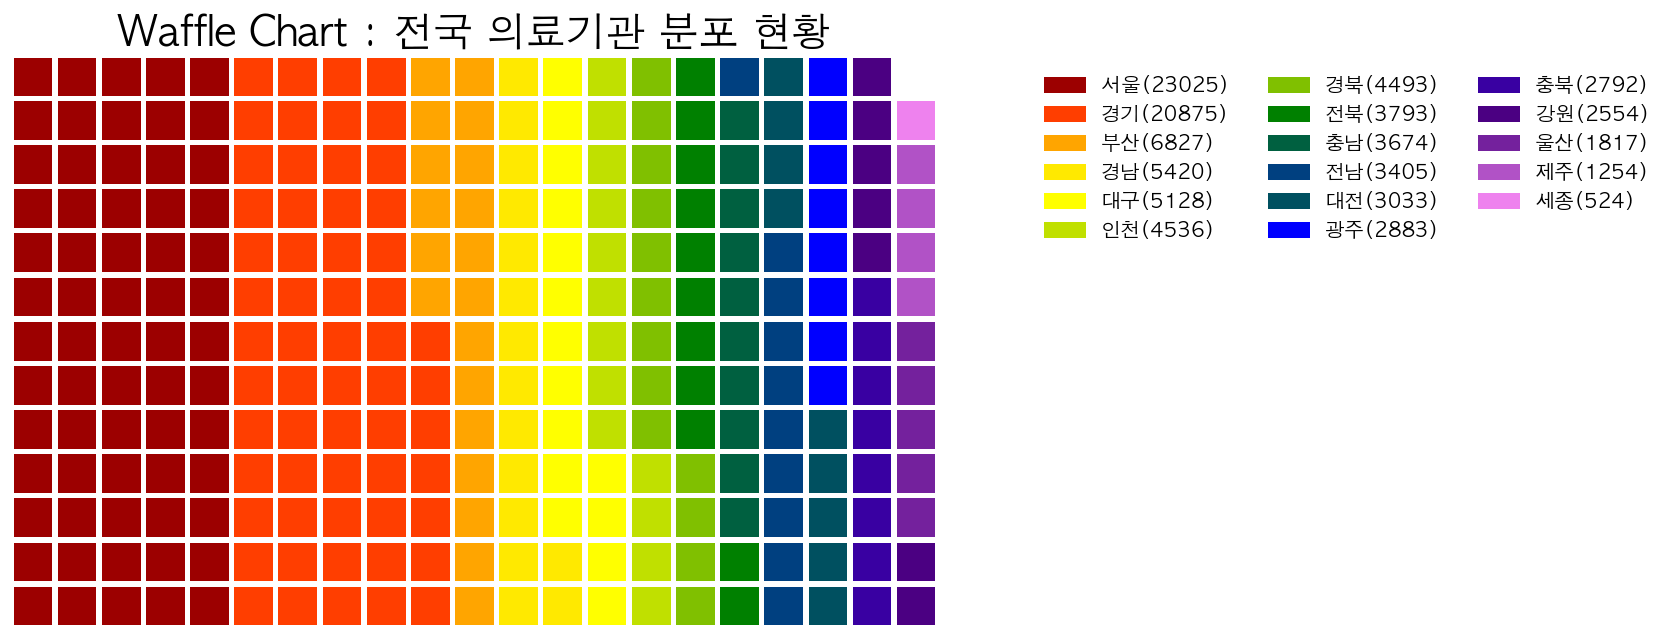

In [21]:
org_series = org['계'].sort_values(ascending=False)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=13, 
    columns=21, 
    values=org_series,
    colors=['#9C0000', '#FF3E00', '#ffa500', '#FFE900', '#ffff00', '#C0E000', '#80C000', '#008000', '#006040', '#004080', '#005060', '#0000ff', '#3900A2', '#4b0082', '#74219D', '#B152C6', '#ee82ee'],
    labels=["{}({})".format(a, b) for a, b in zip(org_series.index, org_series) ],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'ncol': len(df_org_sido)//5,  'framealpha': 0},
    figsize=(12, 12),  
    icon_legend=True
)

plt.title('Waffle Chart : 전국 의료기관 분포 현황', fontdict = {'fontsize' : 20})

plt.show()

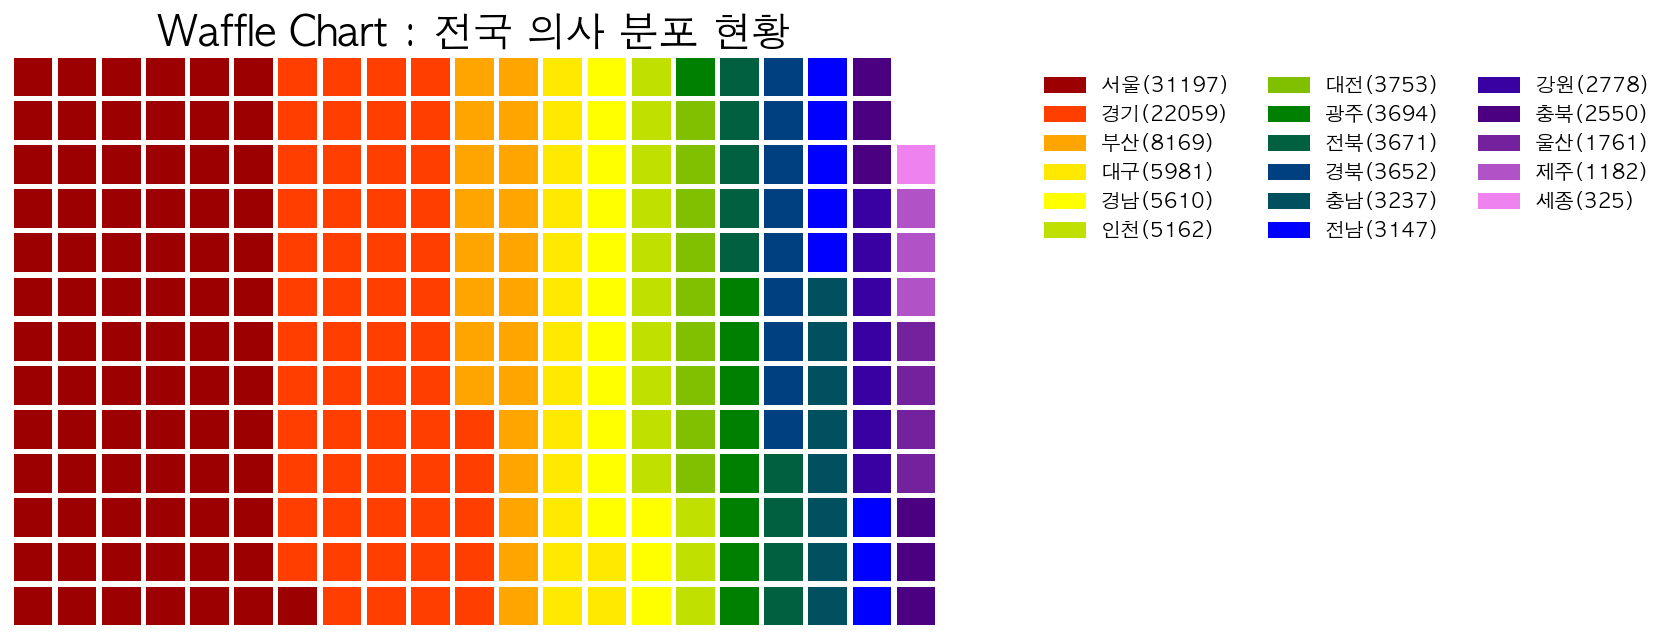

In [22]:
doc_series = doc['의사계'].sort_values(ascending=False)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=13, 
    columns=21, 
    values=doc_series,
    colors=['#9C0000', '#FF3E00', '#ffa500', '#FFE900', '#ffff00', '#C0E000', '#80C000', '#008000', '#006040', '#004080', '#005060', '#0000ff', '#3900A2', '#4b0082', '#74219D', '#B152C6', '#ee82ee'],
    labels=["{}({})".format(a, b) for a, b in zip(doc_series.index, doc_series) ],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'ncol': len(df_doctor_sido)//5,  'framealpha': 0},
    figsize=(12, 12),  
    icon_legend=True
)

plt.title('Waffle Chart : 전국 의사 분포 현황', fontdict = {'fontsize' : 20})

plt.show()

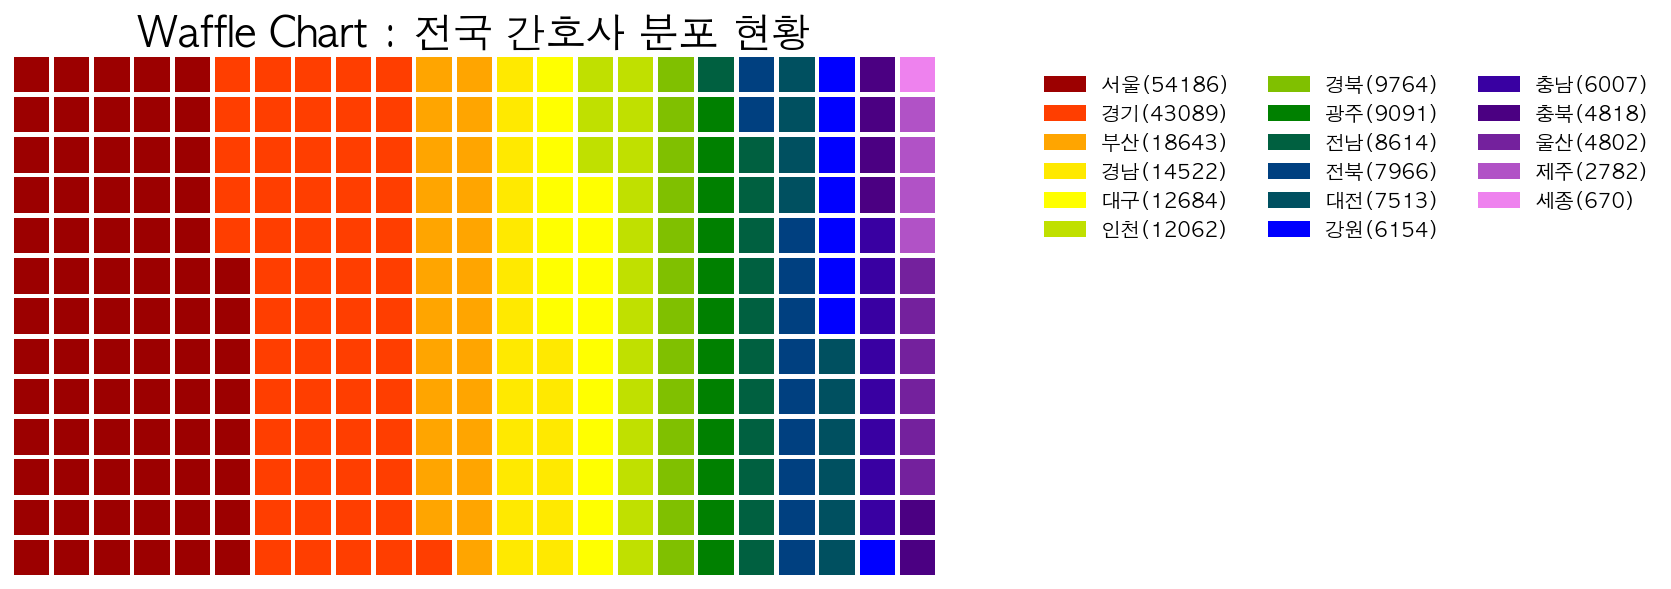

In [23]:
nurse_series = nurse['간호사계'].sort_values(ascending=False)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=13, 
    columns=23, 
    values=nurse_series,
    colors=['#9C0000', '#FF3E00', '#ffa500', '#FFE900', '#ffff00', '#C0E000', '#80C000', '#008000', '#006040', '#004080', '#005060', '#0000ff', '#3900A2', '#4b0082', '#74219D', '#B152C6', '#ee82ee'],
    labels=["{}({})".format(a, b) for a, b in zip(nurse_series.index, nurse_series) ],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'ncol': len(df_nurse_sido)//5,  'framealpha': 0},
    figsize=(12, 12),  
    icon_legend=True
)

plt.title('Waffle Chart : 전국 간호사 분포 현황', fontdict = {'fontsize' : 20})

plt.show()

## 종합병원 분포 분석

In [24]:
df_org_hospital = df_org_sido.copy()
df_org_hospital['종합병원계'] = df_org_hospital['상급종합병원'] + df_org_hospital['종합병원']
df_org_hospital.sort_values(by=['종합병원계'], inplace=True, ascending=False)

df_org_hospital.head()

,시도,시군구,계,상급종합병원,종합병원,병원,요양병원,의원,치과병원,치과의원,조산원,보건소,보건지소,보건진료소,보건의료원,약국,한방병원,한의원,종합병원계
81,경기,계,20875,5,61,286,349,7170,37,4260,7,45,124,161,1,5129,81,3159,66
0,서울,계,23025,13,44,230,126,8775,64,4858,3,25,8,0,0,5200,56,3623,57
26,부산,계,6827,4,25,144,187,2407,24,1284,2,16,11,5,0,1560,12,1146,29
239,경남,계,5420,2,23,141,148,1646,20,905,1,19,174,221,1,1297,15,807,25
191,전남,계,3405,1,23,79,89,939,6,490,1,19,214,327,3,817,25,372,24


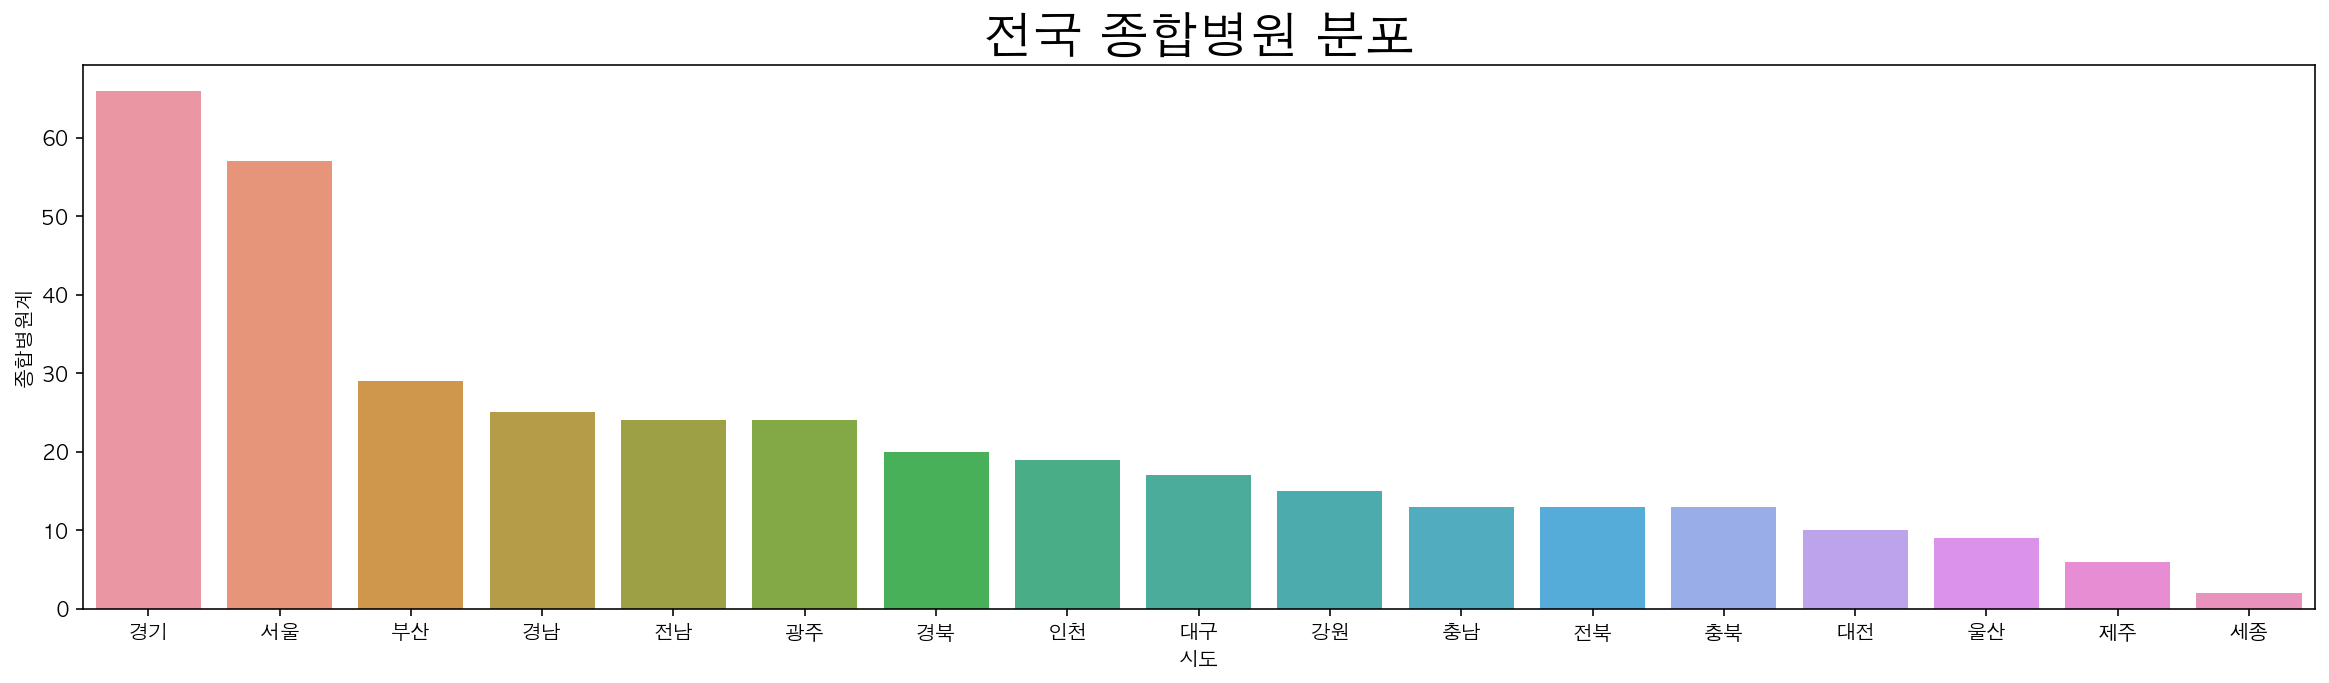

In [25]:
plt.figure(figsize=(20, 5))

sns.barplot(
    data=df_org_hospital,
    x="시도",
    y="종합병원계"
)

plt.title("전국 종합병원 분포", fontdict={'fontsize':25})
plt.show()

## 알 수 있었던 점
의료기관 및 인력의 수도권 편중이 심각하다